<a href="https://colab.research.google.com/github/TheSamHub/Active-Time/blob/main/ActiveTime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import csv
with open('/content/drive/MyDrive/trainingdata.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

sleep =[]
active=[]

for i in range(1,len(data)):
  active.append(int(data[i][0]))

for i in range(1,len(data)):
  sleep.append(int(data[i][1]))

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import model_selection
from sklearn import metrics
%matplotlib inline

In [16]:
dataset = pd.DataFrame(
    {'Active': active,
     'Sleep': sleep
    })

In [17]:
dataset

,Active,Sleep
0,22,7
1,8,4
2,14,5
3,24,8
4,12,4
...,...,...
294,31,10
295,25,8
296,29,9
297,12,5


In [18]:
dataset.to_csv('dataset.csv')

In [19]:
dataset.describe()

,Active,Sleep
count,299.000000,299.000000
mean,14.739130,4.849498
std,9.522431,3.143240
min,0.000000,0.000000
25%,7.000000,2.000000
50%,14.000000,5.000000
75%,23.000000,8.000000
max,34.000000,10.000000


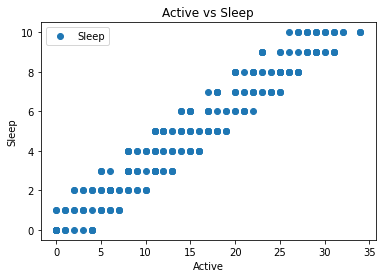

In [20]:
dataset.plot(x='Active', y='Sleep', style='o')  
plt.title('Active vs Sleep')  
plt.xlabel('Active')  
plt.ylabel('Sleep')  
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


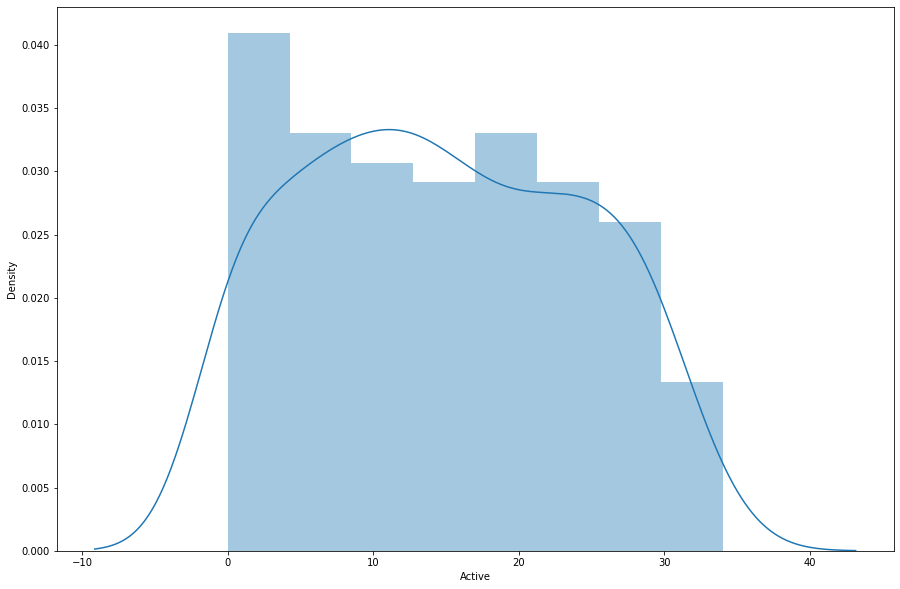

In [21]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['Active'])

In [22]:
X = dataset['Sleep'].values.reshape(-1,1)
y = dataset['Active'].values.reshape(-1,1)

In [ ]:
type(X)

numpy.ndarray

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
import pickle
filename = 'model.pkl'
pickle.dump(regressor, open(filename, 'wb'))

In [25]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[0.50954764]
[[2.92225754]]


In [26]:
y_pred = regressor.predict(X_test)

In [27]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,32,29.732123
1,27,29.732123
2,18,15.120835
3,18,20.965350
4,10,12.198578
5,13,12.198578
6,6,9.276320
7,13,9.276320
8,20,20.965350
9,28,26.809866


In [31]:
from sklearn.metrics import mean_squared_error
print('Accuracy of LR',mean_squared_error(y_pred,y_test))

Accuracy of LR 5.549471503301279


In [34]:
score = r2_score(y_test, y_pred)
print(score)

0.9419065723012637
